# Pré-processamento dos dados com Python

Para este hands on vamos usar o [Data Set do Titanic disponível no Kaggle](https://www.kaggle.com/c/titanic). Este é um conjunto de dados muito famoso. O dataset disponibiliza informações dos passageiros que nos permite aplicar algoritmos de aprendizagem supervisionada para prever se um passageiro sobrevivereu ou não.

Antes de aplicarmos algum classificador para este problema vamos realizar o pré-processamento dos dados.

Este dataset já está parcialmente pré-processado, mas se quiser usar o conjunto de dados original, hospedado diretamente no Kaggle, será um desafio interessante =D.

## O Dicionário de Dados

**Survival**: Sobrevivente (Não=0, Sim=1)

**Pclass**: Classe de ingresso (1=1st, 2=2nd, 3=3rd)

**Sex**: Sexo

**Age**: Idade em anos

**Sibsp**: Quantidade de irmãos e cônjuges a bordo do Titanic

**Parch**: Quantidade de pais e filhos  a bordo do Titanic

**Ticket**: Número do ticket

**Fare**: Tarifa do passageiro

**Cabin**: Número da cabine	

**Embarked**: Portão de Embarque (C=Cherbourg, Q=Queenstown, S=Southampton)



## Import as bibliotecas
Vamos importar algumas bibliotecas para começar!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # biblioteca de visualização utilizada pelo pandas e pelo seaborn
import seaborn as sns # biblioteca de visualização com mais opções de gráficos

## 1. Acessando os dados

* Utilize a função **pd.read_csv** para ler o dado e salve na variável **train**
    - O nome do dataset é **titanic_train.csv**
    - Visualize alguns elementos do seu data set, para isto use **train.head()**

In [2]:
train = pd.read_csv("../data/titanic_train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 2. Exploração dos dados

Vamos verificar verificar os dados que faltam!

## Analise os atributos ausentes

Podemos usar o seaborn para criar um mapa de calor simples, heatmap, para ver onde faltam dados!

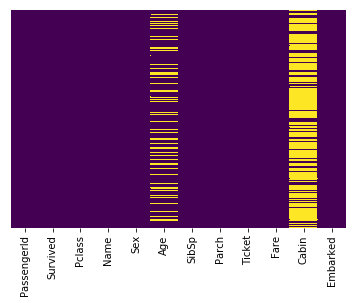

In [3]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

#### Calcule o percentual de valores faltantes para cada coluna


In [4]:
rows = len(train.index)
not_null = train.count()/rows
percent_nulls = (1 - not_null)*100
percent_nulls

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Devemos eliminar a coluna "Age"? Qual a melhor forma de realizar um input para os valores faltantes?

Resp.: Para o atributo "Age" podemos fazer o input dos valores faltantes considerando a média, mediana ou moda.

#### E quanto a coluna "Cabin", o que devemos fazer? Será que poderíamos inferir esse valor com base no preço do ingresso e/ou portão de entrada?

Resp.: Para o atributo "Cabin" podemos fazer o input considerando o valor que mais se repete ou podemos aplicar alguns filtros considerando
    alguma regra de negócio. Outra opção é descartar esse atributo pois o percentual de valores nulos é muito alto.

## + Atividades
#### Veja o exemplo abaixo e realize as seguintes atividades

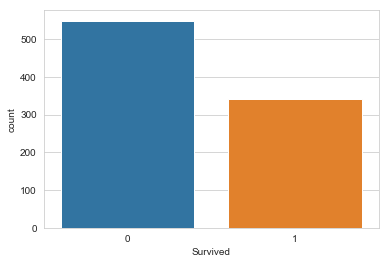

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

#### Plot os dados no countplot com a informação do SibSp

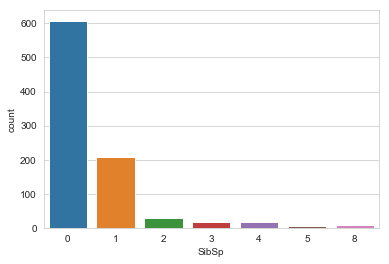

In [6]:
sns.countplot(x='SibSp',data=train)

#### Morreram mais homens ou mulheres? Plot os dados no countplot com a informação do Sex no eixo X e faça a distinção entre os sobreviventes. *(Dica: use o parâmetro hue)*

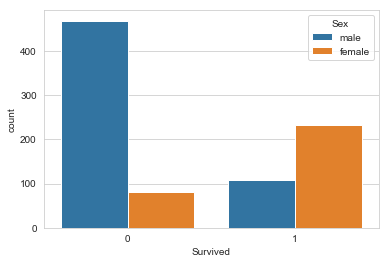

In [7]:
sns.countplot(x='Survived', hue='Sex', data=train)

Resp.: Morreram mais homens. Este fato corrobora para o que assistimos no filme, primeiro mulheres e crianças.

 #### Agora plot os dados no countplot com a informação do Pclass no eixo X. *(Dica: use o parâmetro hue)*

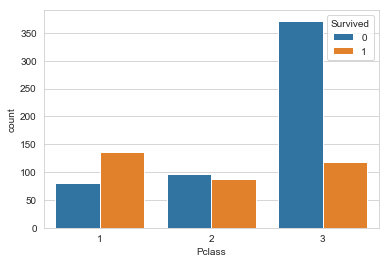

In [8]:
sns.countplot(x='Pclass', hue='Survived', data=train)

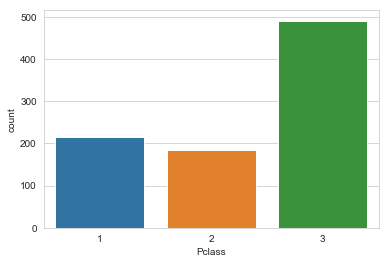

In [9]:
sns.countplot(x='Pclass', data=train)

#### Quais insights você consegue observar a partir destes novos gráficos? Discuta com seu parrceiro

**Resp.:** A proporção de pessoas da terceira classe que morreram foi a mais alta.

#### Veja o exemplo abaixo e onstrua um histograma considerando as informações contidas no **Fare**. Quais insights você consegue observar a partir destes gráficos?

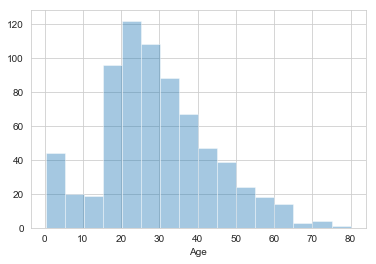

In [10]:
sns.distplot(train['Age'].dropna(),kde=False, bins=16)

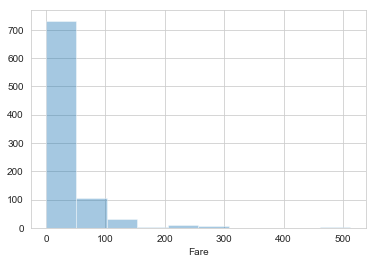

In [11]:
sns.distplot(train['Fare'].dropna(),kde=False, bins=10)

**Resp.:** A maioria dos tickets custaram entre 0 e 100 dólares.

___
## 3. Limpeza dos Dados

Queremos preencher os dados que faltam em algumas amostras para o atributo **Age** e também eliminar informações que não são úteis. Uma maneira de fazer isso é preencher com o valor da idade média de todos os passageiros. O que vocês acham? Há outra forma melhor de fazer? Vejam abaixo um exemplo de um box plot gráfico 

**Resp:** A média não é um valor interessante, pois essa medida pode ser influenciada pelos outliers, valores discrepantes, sejam valores altos ou baixos.
   * Para visualizar detalhes de uma coluna você pode usar **dataframe['coluna'].describe()**
   * Para recuperar a média você pode utilizar a função **mean** sobre a coluna
   * Para preencher a coluna **Age** você pode criar uma função que retorne um valor, e posteriormente aplicar na coluna Age **df['column'] = df[['column']].apply(function, axis=1)** ou applicar **df['column'].fillna(value=valor_desejado, inplace=True)**.


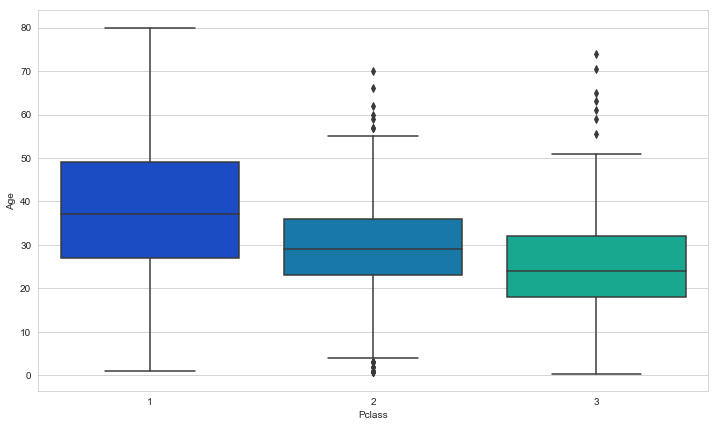

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

### Atividades

#### Qual insight você tem a partir desse gráfico?

**Resp:** Quanto maior o valor da mediana melhor foi a classe da pessoa no navio. Isso reforça a ideia
de que quanto mais velho, mais recursos a pessoa tem.

#### Realize o input da coluna **Age**, considerando a média da idade pelo **Pclass** e não a média geral da Idade.
- Crie um novo mapa de calor

In [13]:
#train.groupby('Pclass').median()['Age']
train.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [14]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):

        if pclass == 1:
            return 37

        elif pclass == 2:
            return 29

        else:
            return 24

    else:
        return age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

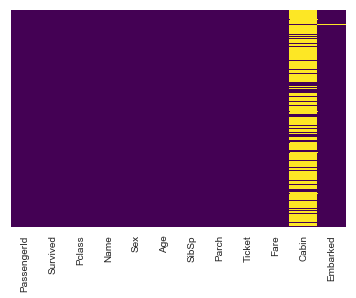

In [15]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### + Atividades :P

#### Elimine as colunas **Cabin, Name, PassengerId e Ticket** do DataSet. Por quê mesmo vamos eliminá-las?

In [16]:
train.drop(['Cabin', 'PassengerId'], axis=1, inplace=True)
#train.drop(['Cabin','Ticket','Name'], axis=1, inplace=True)

**Resp.:** Devemos eliminar a Cabin, pois há muitos valores nulos. As colunas Ticket e Name devem ser eliminados, pois trata-se de valores únicos. Quando temos valores únicos podemos aplicar alguma estratégia para sumarizar esse dado, por exemplo, podemos substituir o nome pelo prenome.


#### Construa um novo heatmap e verifique se há ainda algum valor nulo. Se houver, vamos eliminá-lo! Para fazer isto use df.dropna(inplace=True). Antes disso verique quantos registros serão eliminados.

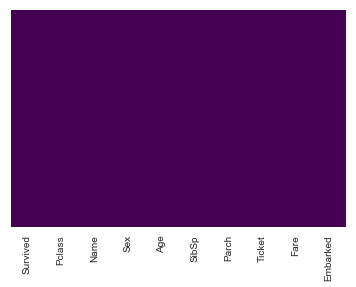

In [17]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [18]:
train.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         891
SibSp       891
Parch       891
Ticket      891
Fare        891
Embarked    889
dtype: int64

In [19]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [20]:
train.dropna(inplace=True)
train.count()

Survived    889
Pclass      889
Name        889
Sex         889
Age         889
SibSp       889
Parch       889
Ticket      889
Fare        889
Embarked    889
dtype: int64

## Criação e/ou Transformação

Precisamos converter atributos categóricos em variáveis numéricas usando pandas, a função **get_dummies** aplica o labelEncoding e OneHotEncoding!
Caso contrário, nosso algoritmo de ML não será apto para trabalhar com recursos diretamente categóricos como entradas.

### Hands on

#### Veja o exemplo abaixo e refaça o mesmo processo para **todos** os atributos categóricos (por exemplo, o atributo **Embarked**)
   * Visualize como os seus dados estão ficando
   * Remova as variáveis que passaram pelo processo de one hot encoding

In [21]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
sex = pd.get_dummies(train['Sex'], prefix='Gender', drop_first=True)
embarked = pd.get_dummies(train['Embarked'], prefix='Embarked')
pclass = pd.get_dummies(train['Pclass'], prefix='Class')

In [23]:
train = pd.concat([train,sex,embarked,pclass],axis=1)

In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1,1,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1,0,0,1


In [25]:
train.drop(['Sex','Embarked','Pclass'], axis=1, inplace=True)

In [26]:
train.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,1,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1,0,0,1


#### Alguém pode explicar o que o código acima fez e por quê não foi adicionada a coluna "Female"? 

**Resp:** Foi aplicado o processo de one hot encoding. Este valor não foi adicionado devido ao parâmetro drop_first está "True". Este parâmetro indica que deve ser eliminado um dos valores do oneHotEncoding.

#### Aplique normalização sobre as tarifas


In [27]:
def normalize(x, mean, std):
    z = (x - mean)/std
    return z

mean_fare = train['Fare'].mean()
std_fare = train['Fare'].std()
train['Z_Fare'] = train['Fare'].apply(normalize, args=(mean_fare, std_fare))
train.drop(['Fare'], axis=1, inplace=True)

### Que tal substituirmos o nome pelos pronomes de tratamento (e.g Miss., Mrs)

In [28]:
import re

def impute_name(name):
        pattern = re.search("\\,(.+?)\\.", name)
        found='Other'
        if pattern:
            found = pattern.group(1)
        return found

In [29]:
train['Name'] = train['Name'].apply(impute_name)
#Aplicando o oneHotEncoding
name = pd.get_dummies(train['Name'],prefix='Prenome')
train = pd.concat([train, name],axis=1)
#Eliminando a coluna name
train.drop(['Name'],axis=1,inplace=True)
#Exibindo os resultados
pd.set_option('max_columns',100)
train.head()

,Survived,Age,SibSp,Parch,Ticket,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Z_Fare,Prenome_ Capt,Prenome_ Col,Prenome_ Don,Prenome_ Dr,Prenome_ Jonkheer,Prenome_ Lady,Prenome_ Major,Prenome_ Master,Prenome_ Miss,Prenome_ Mlle,Prenome_ Mme,Prenome_ Mr,Prenome_ Mrs,Prenome_ Ms,Prenome_ Rev,Prenome_ Sir,Prenome_ the Countess
0,0,22.0,1,0,A/5 21171,1,0,0,1,0,0,1,-0.499958,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,PC 17599,0,1,0,0,1,0,0,0.788503,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,26.0,0,0,STON/O2. 3101282,0,0,0,1,0,0,1,-0.486376,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,113803,0,0,0,1,1,0,0,0.422623,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,35.0,0,0,373450,1,0,0,1,0,0,1,-0.483861,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Existe alguma informação que podemos utilizar para substituirmos o ticket? Uma média de tarifa por exemplo, considerando a primeira letra do bilhete. Por quê realizar este tipo de tratamento?

**Resp.:** Esta é uma opção de tratamento, muitas outras poderiam ser aplicadas. O objetivo é sumarizar esta informação que atualmente é um identificador único. A solução que aplicaremos é utilizar a primeira letra e o tamanho do ticket

In [30]:
def new_ticket(ticket):
    nt = ticket[0]+"_"+str(len(ticket))
    return nt

train['New_Ticket'] = train['Ticket'].apply(new_ticket)

In [31]:
#Vamos aplicar o one hot encoding sobre o atributo New_Ticket
new_ticket = pd.get_dummies(train['New_Ticket'],prefix='Ticket')
train = pd.concat([train, new_ticket],axis=1)
train.drop(['Ticket', 'New_Ticket'], axis=1, inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Z_Fare,Prenome_ Capt,Prenome_ Col,Prenome_ Don,Prenome_ Dr,Prenome_ Jonkheer,Prenome_ Lady,Prenome_ Major,Prenome_ Master,Prenome_ Miss,Prenome_ Mlle,Prenome_ Mme,Prenome_ Mr,Prenome_ Mrs,Prenome_ Ms,Prenome_ Rev,Prenome_ Sir,Prenome_ the Countess,Ticket_1_4,Ticket_1_5,Ticket_1_6,Ticket_2_4,Ticket_2_5,Ticket_2_6,Ticket_3_4,Ticket_3_5,Ticket_3_6,Ticket_3_7,Ticket_4_4,Ticket_5_4,Ticket_5_5,Ticket_6_3,Ticket_6_4,Ticket_6_5,Ticket_7_4,Ticket_8_4,Ticket_9_4,Ticket_A_10,Ticket_A_8,Ticket_A_9,Ticket_C_10,Ticket_C_16,Ticket_C_6,Ticket_C_7,Ticket_C_8,Ticket_C_9,Ticket_F_10,Ticket_F_12,Ticket_F_9,Ticket_L_4,Ticket_P_7,Ticket_P_8,Ticket_P_9,Ticket_S_10,Ticket_S_11,Ticket_S_12,Ticket_S_13,Ticket_S_15,Ticket_S_16,Ticket_S_17,Ticket_S_18,Ticket_S_7,Ticket_S_9,Ticket_W_10,Ticket_W_11,Ticket_W_9
0,0,22.0,1,0,1,0,0,1,0,0,1,-0.499958,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,0,1,0,0,1,0,0,0.788503,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,0,0,0,1,0,0,1,-0.486376,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,0,0,0,1,1,0,0,0.422623,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,35.0,0,0,1,0,0,1,0,0,1,-0.483861,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
file_name = 'titanic_ready_to_ml.csv'
train.to_csv(file_name, index=False)

In [33]:
df = pd.read_csv(file_name)
df.head(5)

,Survived,Age,SibSp,Parch,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Z_Fare,Prenome_ Capt,Prenome_ Col,Prenome_ Don,Prenome_ Dr,Prenome_ Jonkheer,Prenome_ Lady,Prenome_ Major,Prenome_ Master,Prenome_ Miss,Prenome_ Mlle,Prenome_ Mme,Prenome_ Mr,Prenome_ Mrs,Prenome_ Ms,Prenome_ Rev,Prenome_ Sir,Prenome_ the Countess,Ticket_1_4,Ticket_1_5,Ticket_1_6,Ticket_2_4,Ticket_2_5,Ticket_2_6,Ticket_3_4,Ticket_3_5,Ticket_3_6,Ticket_3_7,Ticket_4_4,Ticket_5_4,Ticket_5_5,Ticket_6_3,Ticket_6_4,Ticket_6_5,Ticket_7_4,Ticket_8_4,Ticket_9_4,Ticket_A_10,Ticket_A_8,Ticket_A_9,Ticket_C_10,Ticket_C_16,Ticket_C_6,Ticket_C_7,Ticket_C_8,Ticket_C_9,Ticket_F_10,Ticket_F_12,Ticket_F_9,Ticket_L_4,Ticket_P_7,Ticket_P_8,Ticket_P_9,Ticket_S_10,Ticket_S_11,Ticket_S_12,Ticket_S_13,Ticket_S_15,Ticket_S_16,Ticket_S_17,Ticket_S_18,Ticket_S_7,Ticket_S_9,Ticket_W_10,Ticket_W_11,Ticket_W_9
0,0,22.0,1,0,1,0,0,1,0,0,1,-0.499958,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,0,1,0,0,1,0,0,0.788503,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,0,0,0,1,0,0,1,-0.486376,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,0,0,0,1,1,0,0,0.422623,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,35.0,0,0,1,0,0,1,0,0,1,-0.483861,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### + Desafios =D

#### Nosso dataset já está tratado e já podemos utilizar em qualquer algoritmo de classificação, mas você pode aplicar outros tratamentos. Segue algumas sugestões.
- Crie uma feature categórica com base na idade da pessoa, (por exemplo, criança, jovem, adulto e criança), no lugar da idade.
- Talvez a cabine possa ser uma característica ... E se a cabine puder ser inferida? Tente descobrir como funcionava a divisão das cabines considerando os outros atributos, por exemplo classe e/ou idade
- Execute o mesmo o pipeline de transformações sobre o dataset de titanic_test.csv

##### Você pode querer explorar outras formas pré-processamento de dados ... fique a vontade =D!